In [1]:
#Invocar Pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Leemos los datos
df0 = pd.read_csv("Nogal.csv",encoding="cp1252")
#df0

C:\Users\Eduardo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (4,5,6,7,8,12,13,15,16,17,19,20,22,23,24,25,26,27,28,29,30,31,32,33,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Eliminamos las columnas que no contienen datos
df1 = df0.drop(df0.columns[df0.columns.str.contains('unnamed:',case=False)],axis=1)
#df1

In [4]:
#Verificamos qué tipo de variables hay en cada columna.
df1.dtypes

DATE            object
TIME            object
u_Avg           object
v_Avg           object
w_Avg           object
t_Avg           object
kh20_Avg        object
net_rad_Avg     object
shf1_Avg        object
shf2_Avg        object
vv_Avg          object
airT_Avg        object
rh_Avg         float64
e_sat_Avg       object
e_Avg           object
h2o_hmp_Avg     object
dtype: object

In [5]:
#Guardamos un repuesto por cualquier cosa que pudiera pasar
df1REPUESTO = df1

#Eliminamos los datos que sean de 2010
df1.drop(range(52338,52639),axis=0)
df1.head()

,DATE,TIME,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg
0,TS,NaN,m/s,m/s,m/s,degC,mV,w/m2,w/m2,w/m2,m/s,degC,NaN,kPa,kPa,g/m3
1,01-01-09,00:10,1.215,0.506,-0.044,10.95,1.159,-176.5,23.58,-26.72,1.327,9.4,0.899,1.178,1.059,8.12
2,01-01-09,00:20,0.892,0.588,-0.072,10.81,1.159,-176.6,23.73,-26.76,1.079,9.24,0.896,1.166,1.045,8.02
3,01-01-09,00:30,1.227,0.6850001,-0.06900001,10.34,1.224,-175.5,23.61,-26.46,1.421,9.059999,0.896,1.152,1.032,7.926001
4,01-01-09,00:40,1.135,0.7410001,-0.093,9.8,1.258,-182.7,23.41,-26.46,1.384,9.059999,0.874,1.152,1.008,7.737


In [6]:
#Creamos un la columna Fecha para la fecha y quitamos la columna de DATE
#Primero hacemos otro DataFrame pero sin el primer renglón (el de las unidades), para luego trabajar con ella
dfA = df1
dfA = df1.drop(0,0)

#Creamos un la columna Fecha para la fecha y quitamos la columna de DATE
dfA["FECHA"] = pd.to_datetime(dfA.apply(lambda x:x["DATE"],1),dayfirst=True)
df2 = dfA.drop(["DATE"],1)
df2.head()

,TIME,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg,FECHA
1,00:10,1.215,0.506,-0.044,10.95,1.159,-176.5,23.58,-26.72,1.327,9.4,0.899,1.178,1.059,8.12,2009-01-01
2,00:20,0.892,0.588,-0.072,10.81,1.159,-176.6,23.73,-26.76,1.079,9.24,0.896,1.166,1.045,8.02,2009-01-01
3,00:30,1.227,0.6850001,-0.06900001,10.34,1.224,-175.5,23.61,-26.46,1.421,9.059999,0.896,1.152,1.032,7.926001,2009-01-01
4,00:40,1.135,0.7410001,-0.093,9.8,1.258,-182.7,23.41,-26.46,1.384,9.059999,0.874,1.152,1.008,7.737,2009-01-01
5,00:50,0.7550001,1.064,-0.149,8.87,1.332,-184.8,23.22,-26.39,1.359,8.63,0.859,1.119,0.961,7.39,2009-01-01


In [7]:
#Ahora comprobamos si la columna FECHA es una variable de tiempo.
df2.dtypes

TIME                   object
u_Avg                  object
v_Avg                  object
w_Avg                  object
t_Avg                  object
kh20_Avg               object
net_rad_Avg            object
shf1_Avg               object
shf2_Avg               object
vv_Avg                 object
airT_Avg               object
rh_Avg                float64
e_sat_Avg              object
e_Avg                  object
h2o_hmp_Avg            object
FECHA          datetime64[ns]
dtype: object

In [8]:
#Declaramos una variable para las columnas:
Rows = {"u_Avg","v_Avg","w_Avg","t_Avg","kh20_Avg","net_rad_Avg","shf1_Avg","shf2_Avg","vv_Avg","airT_Avg","rh_Avg","e_sat_Avg","e_Avg","h2o_hmp_Avg"}
Rows

#Y convertimos las columnas en variables númericas float64.
for Row in Rows:
    df2[Row] = df2[Row].astype(dtype=np.float64)

df2.dtypes

TIME                   object
u_Avg                 float64
v_Avg                 float64
w_Avg                 float64
t_Avg                 float64
kh20_Avg              float64
net_rad_Avg           float64
shf1_Avg              float64
shf2_Avg              float64
vv_Avg                float64
airT_Avg              float64
rh_Avg                float64
e_sat_Avg             float64
e_Avg                 float64
h2o_hmp_Avg           float64
FECHA          datetime64[ns]
dtype: object

In [9]:
df2.head()

,TIME,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg,FECHA
1,00:10,1.215,0.506,-0.044,10.95,1.159,-176.5,23.58,-26.72,1.327,9.400000,0.899,1.178,1.059,8.120000,2009-01-01
2,00:20,0.892,0.588,-0.072,10.81,1.159,-176.6,23.73,-26.76,1.079,9.240000,0.896,1.166,1.045,8.020000,2009-01-01
3,00:30,1.227,0.685,-0.069,10.34,1.224,-175.5,23.61,-26.46,1.421,9.059999,0.896,1.152,1.032,7.926001,2009-01-01
4,00:40,1.135,0.741,-0.093,9.80,1.258,-182.7,23.41,-26.46,1.384,9.059999,0.874,1.152,1.008,7.737000,2009-01-01
5,00:50,0.755,1.064,-0.149,8.87,1.332,-184.8,23.22,-26.39,1.359,8.630000,0.859,1.119,0.961,7.390000,2009-01-01


In [10]:
#Mostramos la correlación
dfC = df2.corr()
dfC

,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg
u_Avg,1.000000,0.241773,0.028537,0.058863,-0.047981,-0.093187,0.089411,0.003093,-0.138616,-0.363807,0.326205,-0.372100,0.107109,0.173845
v_Avg,0.241773,1.000000,0.016387,0.019921,0.153061,-0.116671,0.029321,-0.053957,-0.075175,-0.341920,0.099303,-0.346782,-0.103330,-0.189840
w_Avg,0.028537,0.016387,1.000000,0.667294,0.121010,0.044286,-0.079466,-0.011563,0.923685,-0.374504,0.760058,-0.222593,0.641772,0.125133
t_Avg,0.058863,0.019921,0.667294,1.000000,-0.002184,0.064174,-0.094414,-0.008491,0.593997,-0.288852,0.433942,-0.183273,0.340214,0.576896
kh20_Avg,-0.047981,0.153061,0.121010,-0.002184,1.000000,-0.157635,-0.005268,-0.058466,0.149991,-0.116329,0.031765,-0.119534,-0.134477,-0.326760
net_rad_Avg,-0.093187,-0.116671,0.044286,0.064174,-0.157635,1.000000,-0.206065,-0.027180,0.156017,0.326684,-0.254705,0.381454,0.076382,0.056376
shf1_Avg,0.089411,0.029321,-0.079466,-0.094414,-0.005268,-0.206065,1.000000,0.059003,-0.089608,-0.121637,0.084782,-0.138901,-0.016448,0.014207
shf2_Avg,0.003093,-0.053957,-0.011563,-0.008491,-0.058466,-0.027180,0.059003,1.000000,-0.017869,0.077130,0.014974,0.081516,0.048861,0.151206
vv_Avg,-0.138616,-0.075175,0.923685,0.593997,0.149991,0.156017,-0.089608,-0.017869,1.000000,-0.264771,0.624201,-0.125826,0.525220,-0.193064
airT_Avg,-0.363807,-0.341920,-0.374504,-0.288852,-0.116329,0.326684,-0.121637,0.077130,-0.264771,1.000000,-0.501728,0.963527,0.050730,0.464621


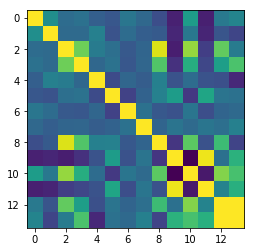

In [11]:
plt.imshow(dfC)

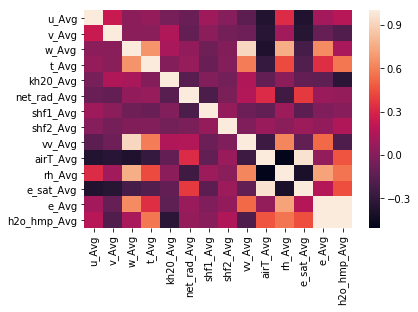

In [12]:
sns.heatmap(dfC)

Text(0.5, 1.0, 'w_Avg vs t_Avg (corr=0.6013)')

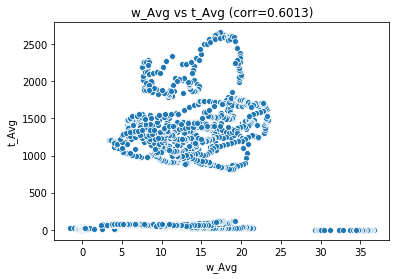

In [13]:
#Hacemos la gráfica de dispersión
#Los casos donde la correlación absoluta es mayor a seis son: (w_Avg, t_Avg), (w_Avg, vv_Avg), (w_Avg, rh_Avg), (w_Avg, e_Avg), (t_Avg, w_Avg) (vv_Avg, w_Avg), (airT_Avg, e_sat_Avg), (rh_Avg, w_Avg), (rh_Avg, e_Avg), (e_sat_Avg, airT_Avg), (e_Avg, w_Avg), (e_Avg, rh_Avg), (e_Avg, h2o_hmp_Avg), (h2o_hmp_Avg, e_Avg).
#Las graficamos
sns.scatterplot(x=df2["w_Avg"],y=df2["t_Avg"])
plt.title("w_Avg vs t_Avg (corr=0.6013)")

Text(0.5, 1.0, 'w_Avg vs vv_Avg (corr=0.9128)')

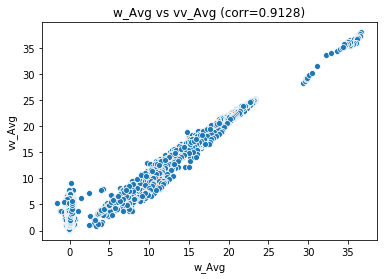

In [14]:
#Procedemos a graficar el resto cada una por separado
sns.scatterplot(x=df2["w_Avg"],y=df2["vv_Avg"])
plt.title("w_Avg vs vv_Avg (corr=0.9128)")

Text(0.5, 1.0, 'w_Avg vs rh_Avg (corr=0.7375)')

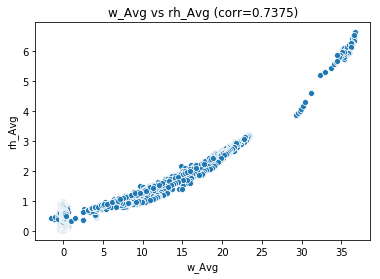

In [15]:
sns.scatterplot(x=df2["w_Avg"],y=df2["rh_Avg"])
plt.title("w_Avg vs rh_Avg (corr=0.7375)")

Text(0.5, 1.0, 'w_Avg vs e_Avg (corr=0.6463)')

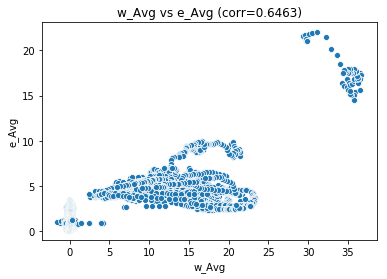

In [16]:
sns.scatterplot(x=df2["w_Avg"],y=df2["e_Avg"])
plt.title("w_Avg vs e_Avg (corr=0.6463)")

Text(0.5, 1.0, 't_Avg vs w_Avg (corr=0.6013)')

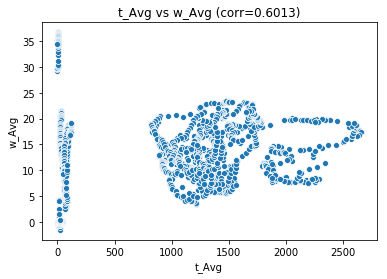

In [17]:
sns.scatterplot(x=df2["t_Avg"],y=df2["w_Avg"])
plt.title("t_Avg vs w_Avg (corr=0.6013)")

Text(0.5, 1.0, 'vv_Avg vs w_Avg (corr=0.9128)')

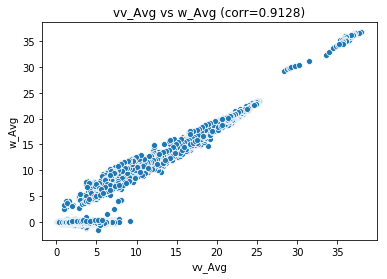

In [18]:
sns.scatterplot(x=df2["vv_Avg"],y=df2["w_Avg"])
plt.title("vv_Avg vs w_Avg (corr=0.9128)")

Text(0.5, 1.0, 'airT_Avg vs e_sat_Avg (corr=0.9644)')

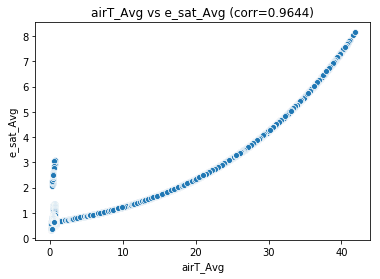

In [19]:
sns.scatterplot(x=df2["airT_Avg"],y=df2["e_sat_Avg"])
plt.title("airT_Avg vs e_sat_Avg (corr=0.9644)")

Text(0.5, 1.0, 'rh_Avg vs w_Avg (corr=0.7375)')

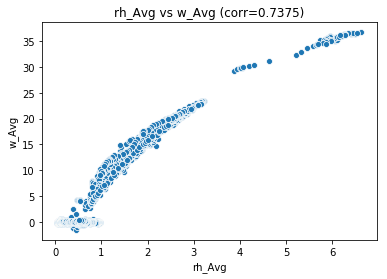

In [20]:
sns.scatterplot(x=df2["rh_Avg"],y=df2["w_Avg"])
plt.title("rh_Avg vs w_Avg (corr=0.7375)")

Text(0.5, 1.0, 'rh_Avg vs e_Avg (corr=0.7286)')

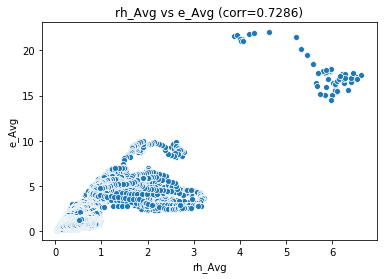

In [21]:
sns.scatterplot(x=df2["rh_Avg"],y=df2["e_Avg"])
plt.title("rh_Avg vs e_Avg (corr=0.7286)")

Text(0.5, 1.0, 'e_sat_Avg vs airT_Avg (corr=0.9644)')

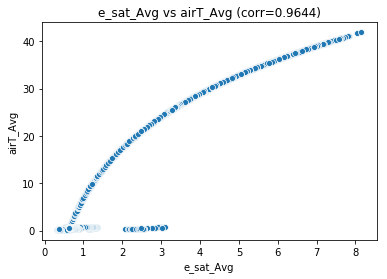

In [22]:
sns.scatterplot(x=df2["e_sat_Avg"],y=df2["airT_Avg"])
plt.title("e_sat_Avg vs airT_Avg (corr=0.9644)")

Text(0.5, 1.0, 'e_Avg vs w_Avg (corr=0.0.641772)')

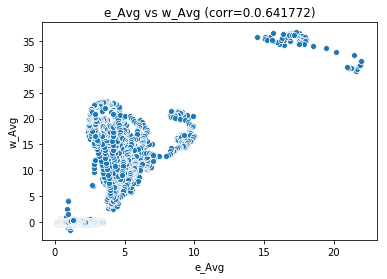

In [23]:
sns.scatterplot(x=df2["e_Avg"],y=df2["w_Avg"])
plt.title("e_Avg vs w_Avg (corr=0.0.641772)")

Text(0.5, 1.0, 'e_Avg vs rh_Avg (corr=0.7286)')

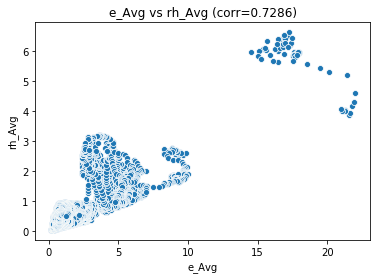

In [24]:
sns.scatterplot(x=df2["e_Avg"],y=df2["rh_Avg"])
plt.title("e_Avg vs rh_Avg (corr=0.7286)")

Text(0.5, 1.0, 'e_Avg vs h2o_hmp_Avg (corr=0.9991)')

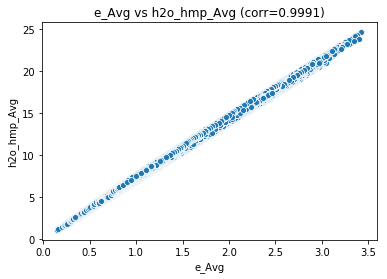

In [25]:
sns.scatterplot(x=df2["e_Avg"],y=df2["h2o_hmp_Avg"])
plt.title("e_Avg vs h2o_hmp_Avg (corr=0.9991)")

Text(0.5, 1.0, 'h2o_hmp_Avg vs e_Avg (corr=0.9991)')

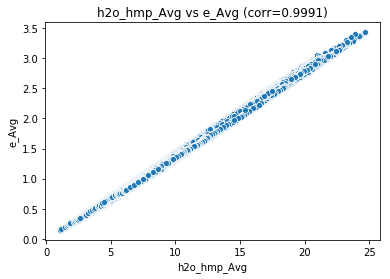

In [26]:
sns.scatterplot(x=df2["h2o_hmp_Avg"],y=df2["e_Avg"])
plt.title("h2o_hmp_Avg vs e_Avg (corr=0.9991)")